# 복습문제

<1> 다음 중 랜덤 포레스트의 설명으로 옳지 않은 것은?
1) 가지를 나눌 때마다 p개이 변수 중 랜덤하게 m개의 변수만 고려한다.
2) 소수의 변수들의 대한 상관성이나 원소가 가진 영향력을 제거하 수 있다.
3) 원본 데이터의 건수가 200개일 때 10개의 결정 트리 기반으로 학습하려고 하면 20개씩 10개의 데이터 건수를 나눈다.
4) 여러 개의 데이터 세트를 분할할 때, 부트스트래핑(bootstrapping) 분할 방식을 이용하며, 이는 중첩(복원)을 허용함

랜덤 포레스트는 배깅의 대표적인 방식으로 3번이 옳지 않음

In [1]:
from hyperopt import hp
search_space = {'x' : hp.quniform('x', -20, 20, 2), 'y' : hp.quniform('y', -15, 15, 1)}

<2> HyperOpt 적용하여 최적의 파라미터 값을 찾을 때, 교차 검증 정확도의 평균에 -1을 곱하여 목적합수 입력값(fmin()의 인수)으로 넣는 이유는?

- fmin() 함수는 작은 값을 더 좋은 최적화로 판단하기 때문에
- 정확도는 높은 값일수록 좋은 성능을 지닌 지표라고 판단하기 때문

<3> 사이킷런 분류 알고리즘에서 각 label 데이터의 학률을 보여주는 메서드는?

- predict_proba

<3> 보기에서 트린 것을 고르세요
1. 정밀도가 중요한 경우는 음성데이터를 양성으로 잘못 판단하면 큰 영향이 발생하는 경우
2. TP/(TP + FP)는 정밀도 공식
3. True Positive Rate은 재현율
4. 전체 환자를 Positive라 예측하고 실제 양성인 환자가 n명이라면 재현율은 0이 된다
5. 전체 환자 중 1명만 Positive라 예측하고 나머지를 전부 Negative라 예측하면 정밀도는 1이 된다.

- 4번 (1이 됨)

<4> 오차 행렬의 원소값을 이용하여 정밀도, 재현율(민감도), 특이도에 대한 수식을 쓰시오

- 정밀도 = TP/(TP + FP)
- 재현율 = TP/(TP + FN)  = recall, sensitivity, TPR
- 특이도 = TN/(TN + FP)

<5> 연료 종류(fl)를 레이블 값으로 설정해 이를 예측할 수 있는 지 구현

In [57]:
import pydataset

mpg = pydataset.data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [58]:
### 문자열의 개수를 세서 dictionary 형태로 반환함
from collections import Counter
Counter(mpg.fl)

Counter({'p': 52, 'r': 168, 'e': 8, 'd': 5, 'c': 1})

In [59]:
## 연료 종류 e, d, c의 개수가 너무 적어 이는 삭제하고 p, r 종류만 레이블 값으로 구려고 함.
## e, d, c인 행은 삭제하시오.
import numpy as np

mpg['fl'].replace(['e', 'd', 'c'], np.nan, inplace = True)
mpg = mpg.dropna(axis = 0)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [32]:
## 방법 2, 3
mpg.loc[(mpg.fl == 'p') | (mpg.fl == 'r')] 

mpg.query("fl == 'p' | fl == 'r'") 

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [60]:
X = features = mpg.drop(['fl'], axis = 1)
y = labels = mpg['fl']

In [61]:
## features는 모두 숫자여야 함
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for column in ['manufacturer', 'model', 'trans', 'drv', 'class']:
    encoder.fit(X[column])
    encoded = encoder.transform(X[column])
    X[column] = encoded

In [62]:
X

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,class
1,0,1,1.8,1999,4,3,1,18,29,1
2,0,1,1.8,1999,4,8,1,21,29,1
3,0,1,2.0,2008,4,9,1,20,31,1
4,0,1,2.0,2008,4,0,1,21,30,1
5,0,1,2.8,1999,6,3,1,16,26,1
...,...,...,...,...,...,...,...,...,...,...
230,14,31,2.0,2008,4,7,1,19,28,2
231,14,31,2.0,2008,4,9,1,21,29,2
232,14,31,2.8,1999,6,3,1,16,26,2
233,14,31,2.8,1999,6,8,1,18,26,2


In [64]:
encoder.fit(y)
encoded_y = encoder.transform(y)
y = encoded_y
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [69]:
## cross_val_score
## classifier : DecisionTree, 정제한 데이터 구간 5개로 나누기, 평가 지표 : 정확도
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

score = cross_val_score(dt_clf, features, labels, scoring = 'accuracy', cv = 5)
score.mean()

0.6954545454545455

# 수업

## 분류 실습 - 캐글 신용카드 사기 검출

### 언더 샘플링과 오버 샘플링의 이해

- 지도학습에서 극도로 불균형한 레이블 값 분포로 인한 문제점을 해결하기 위해서는 적절한 학습 데이터를 확보하는 방안이 필요한데, 대표적으로 오버 샘플링(Oversampling)과 언더 샘플링(Undersampling) 방법이 있음
- 오버 샘플링 방식이 예측 성능상 조금 유리한 경우가 많아 상대적으로 더 많이 사용됨

언더 샘플링
- 언더 샘플링은 많은 데이터 세트를 작은 데이터 수준으로 감소시키는 방식
- 정상 레이블을 가진 데이터가 10000건, 이상 레이블을 가진 데이터가 100건이 있으면 정상 레이블 데이터를 100건으로 줄여 버리는 방식임
- 정상 레이블 데이터를 이상 레이블 데이터 수준으로 줄여 버린 상태에서 학습을 수행하면 과도하게 정상 레이블로 학습/예측하는 부작용을 개선할 수 있음
- 하지만 너무 많은 정상 데이터를 감소시켜서 정상 레이블의 경우 제대로 된 학습을 수행할 수 없는 문제가 발생할 수도 있으므로 유의해야 함

오버 샘플링
- 이상 데이터와 같이 적은 데이터 세트를 증식하여 학습을 위한 충분한 데이터를 확보하는 방법
- 동일한 데이터를 단순히 증식하는 방법은 과적합이 되기 때문에 의미가 없으므로 원본 데이터의 피처 값들을 아주 약간만 변경하여 증식함
- 대표적으로 SMOTE(Synthetic Minority Over-sampling Technique) 방법이 있음
- SMOTE는 적은 데이터 세트에 있는 개별 데이터들의 K 최근접 이웃(K Nearest Neighbir)을 찾아서 이 데이터와 K개 이웃들의 차이를 일정 값으로 만들어서 기존 데이터와 약간 차이가 나는 새로운 데이터들을 생성하는 방식임

- 오버 샘플링 기법 중 하나인 SMOTE를 구현한 패키지 imbalanced-learn

In [72]:
pip install imbalanced-learn

     -------------------------------------- 199.3/199.3 kB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### 데이터 일차 가공 및 모델 학습/예측/평가

In [120]:
import pandas as pd
card_df = pd.read_csv('./data/creditcard.csv')
card = card_df.copy()
card

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


- 데이터 전처리

In [121]:
# Time 피처는 데이터 생성 관련 작업용 속성으로 큰 의미 없으므로 제거
# Amount 피처는 신용카드 transaction
# Class는 레이블로서 0의 경우 정상, 1의 경우 사기임

card.drop('Time', axis = 1, inplace = True)
card

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


- 데이터셋 분리

In [122]:
from sklearn.model_selection import train_test_split

X = features = card.iloc[:, :-1]
y = labels = card.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .3, stratify = labels)
# stratify는 label의 비율도 반영하라고 알려주는 파라미터임

In [123]:
y_train.value_counts()/len(y_train)  # len(y_train)은 y_train.shape[0]와 같음

0    0.998275
1    0.001725
Name: Class, dtype: float64

- 모델 생성, fit, predict, evaluate

In [91]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc)) 

In [124]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 1000)

lr_clf.fit(X_train, y_train)

preds = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)


###  TN | FP
### ---------
###  FN | TP

오차 행렬
[[85282    13]
 [   62    86]]
정확도: 0.9991, 정밀도: 0.8687, 재현율: 0.5811,    F1: 0.6964, AUC:0.9752


- lightgbm으로 만들기

In [125]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 100, num_leaves = 64, n_jobs = -1, boost_from_average = False)

lgbm_clf.fit(X_train, y_train)

preds = lgbm_clf.predict(X_test)
pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)


## boost_from_average는 뭔가요?
## boosting 계열 알고리즘은 최초로 만들어진 Tree에서 오류를 보정하면서 지속적으로 Tree를 update합니다. 
## 이때 최초 Tree를 만들때 오류를 update하기 위해 어떤 score값을 만드는데 
## 이때 타겟값의 특정 평균값을 사용할것인지 아닌지를 나타내는 파라미터로 알고 있습니다.

오차 행렬
[[85285    10]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9187, 재현율: 0.7635,    F1: 0.8339, AUC:0.9571


- 본 예제와 같이 레이블 값이 극도로 불균형한 분포를 이루는 경우 boost_from_average = True 설정은 재현률 및 ROC-AUC 성능을 매우 크게 저하시킴
- LightGBM 2.1.0 이상은 boost_from_average의 디폴트가 True이므로 확인 필요함

### 데이터 정제 후 적용(데이터 분포도 변환 후 모델 학습/예측/평가)

#### 표준화

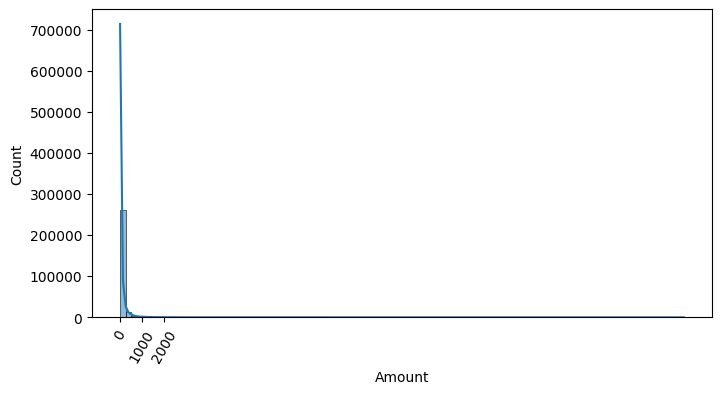

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8, 4))
plt.xticks(range(0, 3000, 1000), rotation = 60)
sns.histplot(card_df['Amount'], bins = 100, kde = True)
plt.show()

In [99]:
card['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

- Amount, 즉 카드 사용금액이 1000불 이하인 데이터가 대부분으며, 26000불까지 드물지만 많은 금액을 사용한 경우가 발생하면서 꼬리가 긴 형태의 분포 곡선을 가지고 있음

- Amount를 표준 정규 분포 형태로 변환한 뒤에 로지스틱 회귀 예측 성능 측정

In [126]:
##### 표준화 하기 #####
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

card['Amount'] = scaler.fit_transform(card['Amount'].values.reshape(-1, 1))  # fit하려면 array가 (-1, 1)여야 함

In [127]:
card

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [128]:
##### 데이터셋 분리 #####
from sklearn.model_selection import train_test_split

X = features = card.iloc[:, :-1]
y = labels = card.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .3, stratify = labels)

In [129]:
##### 모델 생성 #####
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 1000)

lr_clf.fit(X_train, y_train)

preds = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[85282    13]
 [   56    92]]
정확도: 0.9992, 정밀도: 0.8762, 재현율: 0.6216,    F1: 0.7273, AUC:0.9690


In [130]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 100, num_leaves = 64, n_jobs = -1, boost_from_average = False)

lgbm_clf.fit(X_train, y_train)

preds = lgbm_clf.predict(X_test)
pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[85288     7]
 [   32   116]]
정확도: 0.9995, 정밀도: 0.9431, 재현율: 0.7838,    F1: 0.8561, AUC:0.9632


- 표준화 후, 성능 더 좋아짐

In [131]:
# 전체 코드

##### 표준화 하기 #####
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

card['Amount'] = scaler.fit_transform(card['Amount'].values.reshape(-1, 1))  # fit하려면 array가 (-1, 1)여야 함

##### 데이터셋 분리 #####
from sklearn.model_selection import train_test_split

X = features = card.iloc[:, :-1]
y = labels = card.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .3, stratify = labels)

##### 모델 생성 #####
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 1000)

lr_clf.fit(X_train, y_train)

preds = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 100, num_leaves = 64, n_jobs = -1, boost_from_average = False)

lgbm_clf.fit(X_train, y_train)

preds = lgbm_clf.predict(X_test)
pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[85287     8]
 [   57    91]]
정확도: 0.9992, 정밀도: 0.9192, 재현율: 0.6149,    F1: 0.7368, AUC:0.9666
오차 행렬
[[85286     9]
 [   34   114]]
정확도: 0.9995, 정밀도: 0.9268, 재현율: 0.7703,    F1: 0.8413, AUC:0.9740


#### 로그 변환

In [132]:
import pandas as pd
card = pd.read_csv('./data/creditcard.csv')

card.drop('Time', axis = 1, inplace = True)  ## Time 칼럼 삭제

card

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [133]:
# 로그 변환하기
import numpy as np

np.log1p(card['Amount'])

0         5.014760
1         1.305626
2         5.939276
3         4.824306
4         4.262539
            ...   
284802    0.570980
284803    3.249987
284804    4.232366
284805    2.397895
284806    5.384495
Name: Amount, Length: 284807, dtype: float64

In [134]:
card['Amount']

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

### 로그 변환
- 로그 변환은 데이터 분포도가 심하게 왜곡되어 있을 경우 적용하는 중요 기법 중 하나임
- 원래 값을 log 값으로 변환해 원래 큰 값을 상대적으로 작은 값으로 변환하기 때문에 데이터 분포도의 왜곡을 상당 수준 개선해줌
- 로그 변환은 넘파이이 log1p() 함수를 이용해 변환 가능

In [135]:
card['Amount'] = np.log1p(card['Amount'])
card.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539,0


In [136]:
##### 데이터셋 분리 #####
from sklearn.model_selection import train_test_split

X = features = card.iloc[:, :-1]
y = labels = card.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .3, stratify = labels)

##### 모델 생성 #####
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 1000)

lr_clf.fit(X_train, y_train)

preds = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)




from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 100, num_leaves = 64, n_jobs = -1, boost_from_average = False)

lgbm_clf.fit(X_train, y_train)

preds = lgbm_clf.predict(X_test)
pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[85281    14]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8692, 재현율: 0.6284,    F1: 0.7294, AUC:0.9837
오차 행렬
[[85288     7]
 [   24   124]]
정확도: 0.9996, 정밀도: 0.9466, 재현율: 0.8378,    F1: 0.8889, AUC:0.9876


## 이상치 데이터 제거후 모델 학습/예측/평가

- 이상치 데이터(Outlier)는 전체 데이터의 패턴에서 벗어난 이상 값을 가진 데이터이며, 아웃라이어라고도 불림
- 이상치로 인해 머신러닝 모델의 성능에 영향을 받는 경우가 발생하기 쉬움
- IQR 방식

사분위
- 사분위는 전체 데이터를 값이 높은 순으로 정렬하고, 이를 1/4(25%)씩으로 구간을 분할하는 것을 지칭
- 25% 구간 Q1, ~75% 구간 Q3

<AxesSubplot:>

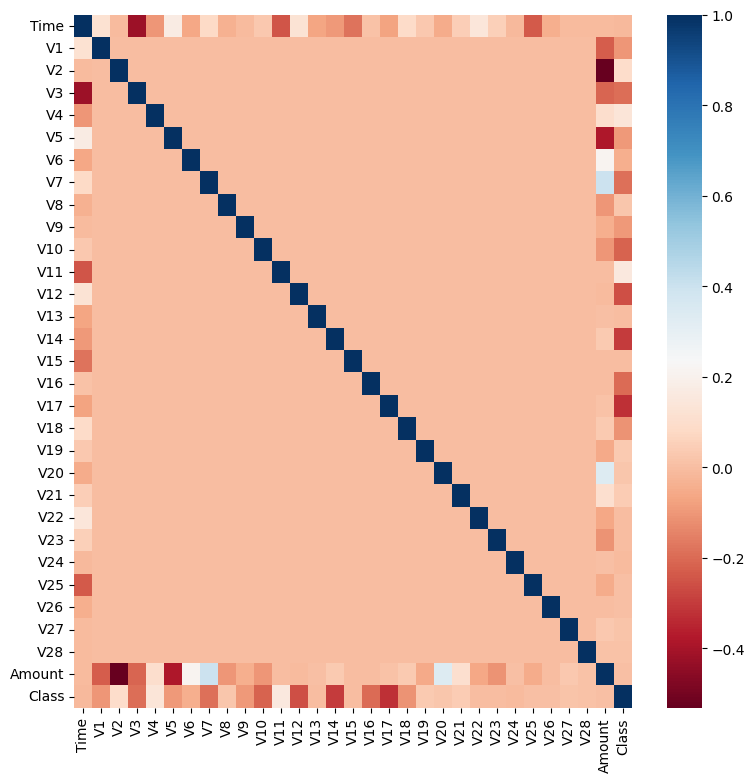

In [208]:
import seaborn as sns

plt.figure(figsize = (9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap = 'RdBu')

- 양의 상관관계가 높을수록 색이 진한 파란색에 가까우며, 음의 상관관계가 높을수록 색이 진한 빨간색에 가까움
- Class피처와 음의 상관관계가 가장 높은 피처는 V14, V17임

In [138]:
card.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [140]:
## class가 1인 것만 추출하기

fraud = card[card['Class'] == 1]
fraud

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.000000,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,6.272877,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,5.484506,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,4.094345,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,0.693147,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,5.968708,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.565314,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,4.368054,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,5.505332,1


In [145]:
fraud['V14']

541      -4.289254
623      -1.692029
4920     -1.470102
6108     -6.771097
6329     -6.079337
            ...   
279863   -6.665177
280143   -5.210141
280149   -4.057162
281144   -6.416628
281674   -1.948883
Name: V14, Length: 492, dtype: float64

In [164]:
## 이상치 구하기 방법 1
pct25 = np.percentile(fraud.V14, 25)
pct75 = np.percentile(fraud.V14, 75)

IQR = pct75 - pct25

upper_out = pct75 + 1.5 * IQR
under_out = pct25 - 1.5 * IQR

cond1 = fraud['V14'] >= upper_out
cond2 = fraud['V14'] <= under_out
outlier = fraud[cond1 | cond2]
outlier

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8296,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,2.030870,-5.902828,-12.840934,...,1.646518,-0.278485,-0.664841,-1.164555,1.701796,0.690806,2.119749,1.108933,0.693147,1
8615,-3.891192,7.098916,-11.426467,8.607557,-2.065706,-2.985288,-8.138589,2.973928,-6.272790,-13.193415,...,1.757085,-0.189709,-0.508629,-1.189308,1.188536,0.605242,1.881529,0.875260,0.693147,1
9035,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,-5.654212,-11.853867,...,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,0.693147,1
9252,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,-13.136698,...,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,0.693147,1


In [163]:
## 이상치 구하기 방법 2
iqr = fraud['V14'].quantile(0.75) - fraud['V14'].quantile(0.25)

con1 = fraud['V14'] <= fraud['V14'].quantile(0.25) - 1.5*iqr
con2 = fraud['V14'] >= fraud['V14'].quantile(0.75) + 1.5*iqr

fraud[con1 | con2] 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8296,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,2.030870,-5.902828,-12.840934,...,1.646518,-0.278485,-0.664841,-1.164555,1.701796,0.690806,2.119749,1.108933,0.693147,1
8615,-3.891192,7.098916,-11.426467,8.607557,-2.065706,-2.985288,-8.138589,2.973928,-6.272790,-13.193415,...,1.757085,-0.189709,-0.508629,-1.189308,1.188536,0.605242,1.881529,0.875260,0.693147,1
9035,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,-5.654212,-11.853867,...,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,0.693147,1
9252,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,-13.136698,...,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,0.693147,1


In [179]:
# 이상치 제거하기

card.drop(labels = outlier_index, axis=0, inplace = True) 

In [181]:
##### 데이터셋 분리 #####
from sklearn.model_selection import train_test_split

X = features = card.iloc[:, :-1]
y = labels = card.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .3, stratify = labels)

##### 모델 생성 #####
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 1000)

lr_clf.fit(X_train, y_train)

preds = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)




from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 100, num_leaves = 64, n_jobs = -1, boost_from_average = False)

lgbm_clf.fit(X_train, y_train)

preds = lgbm_clf.predict(X_test)
pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[85287     8]
 [   65    81]]
정확도: 0.9991, 정밀도: 0.9101, 재현율: 0.5548,    F1: 0.6894, AUC:0.9805
오차 행렬
[[85289     6]
 [   33   113]]
정확도: 0.9995, 정밀도: 0.9496, 재현율: 0.7740,    F1: 0.8528, AUC:0.9861


### SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

- SMOTE를 적용할 때는 반드시 학습 데이터 세트만 오버 샘플링을 해야 함
- 검증 데이터 세트나 테스트 데이터 세트를 오버 샘플링할 경우 결국은 원본 데이터 세트가 아닌 데이터 세트에서 검증 또는 테스트를 수행하기 때문에 올바른 검증/테스트가 될 수 없음

In [228]:
## 데이터셋 분리

from sklearn.model_selection import train_test_split

X = features = card.iloc[:, :-1]
y = labels = card.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .3, stratify = labels)

In [229]:
y_train.value_counts()

0    199020
1       342
Name: Class, dtype: int64

In [230]:
### SMOTE 적용

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [231]:
y_train.value_counts()

0    199020
1    199020
Name: Class, dtype: int64

In [232]:
### 모델 생성, fit, predict, evaluate
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)

preds = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

######

lgbm_clf = LGBMClassifier(n_estimators = 100, num_leaves = 64, n_jobs = -1, boost_from_average = False)

lgbm_clf.fit(X_train, y_train)

preds = lgbm_clf.predict(X_test)
pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[83341  1954]
 [   15   131]]
정확도: 0.9770, 정밀도: 0.0628, 재현율: 0.8973,    F1: 0.1174, AUC:0.9742
오차 행렬
[[85264    31]
 [   33   113]]
정확도: 0.9993, 정밀도: 0.7847, 재현율: 0.7740,    F1: 0.7793, AUC:0.9655


- 로지스틱 회귀 모델이 오버 샘플링으로 인해 실제 원본 데이터의 유형보다 너무나 많은 Class = 1 데이터를 학습하면서 실제 테스트 데이터 세트에서 예측을 지나치게 Class = 1로 적용해 정밀도가 급격히 떨어짐

## 스태킹 앙상블

- 스태킹은 개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출한다는 점에서 앞에 소개한 배깅 및 부스팅과 공통점을 갖고있음
- 가장 큰 차이점은 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행한다는 점임
- 개별 알고리즘의 예측 결과 데이터 세트를 최종적인 메타 데이터 세트로 만들어 별도의 ML 알고리즘으로 최종 학습을 수행하고 테스트 데이터를 기반으로 다시 최종 예측을 수행하는 방식임
- 개별 모델의 예측된 데이터 세트를 다시 기반으로 하여 학습하고 예측하는 방식을 메타 모델이라고 함

- 스태킹 모델은 두 종류의 모델이 필요함
- 첫 번째는 개별적인 기반 모델
- 두 번째는 개별 기반의 예측 데이터를 학습 데이터로 만들어서 학습하는 최종 메타 모델임
- 스태킹 모델의 핵심은 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합해 최종 메타 모델의 학습용 피처 데이터 세트와 테스트용 피처 데이터 세트를 만드는 것

### 기본 스태킹 모델

In [190]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [243]:
cancer = load_breast_cancer()
type(cancer)

# 데이터 처리
X_data = cancer.data

y_label = cancer.target

X_train , X_test , y_train , y_test = train_test_split(X_data , y_label , test_size=0.2 , random_state=0) 

In [193]:
# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

In [194]:
# 개별 모델들을 학습. 
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)

# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정. 
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test) 

In [195]:
print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f} :'.format(accuracy_score(y_test, ada_pred))) 

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도: 0.9561 :


In [201]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred]) 
pred = pred.T    ### 앞의 모델들로 만들어낸 예측치를 새롭게 피처로 두고 새로운 모델을 생성
print(pred.shape) 

(114, 4)


In [202]:
# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = LogisticRegression(C=10) 

lr_final.fit(pred, y_test)
final = lr_final.predict(pred) 

accuracy_score(y_test, final)

0.9736842105263158

### CV 세트 기반의 스태킹

- CV 세트 기반의 스태킹 모델은 과적합을 개선하기 위해 최종 메타 모델을 위한 데이터 세트를 만들 때 교차 검증 기반으로 예측된 결과 데이터 세트를 사용

- 앞 예제에서 마지막에 메타 모델인 로지스틱 회귀 모델 기반에서 최종 학습할 때, 레이블 데이터 세트로 학습 데이터가 아닌 테스트용 레이블 데이터 세트를 기반으로 학습했기 때문에 과적합 문제가 발생할 수 있음

- CV 세트 기반의 스태킹은 이에 대한 개선을 위해 개별 모델들이 각각 교차 검증으로 메타 모델을 위한 학습용 스태킹 데이터 생성과 예측을 위한 테스트용 스태킹 데이터를 생성한 뒤 이를 기반으로 메타 모델이 학습과 예측을 수행함

- 스텝1 : 각 모델별로 원본 학습/테스트 데이터를 예측한 결과 값을 기반으로 메타 모델을 위한 학습용/테스트용 데이터를 생성함


- 스텝 2 : 스텝 1에서 개별 모델들이 생성한 학습용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 학습할 최종 학습용 데이터 세트를 생성함. 마찬가지로 각 모델들이 생성한 테스트용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 예측할 최종 데이터 세트를 생성

In [245]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds값으로 KFold 생성
    kf = KFold(n_splits = n_folds, shuffle = False)
    # 추후에 메타 모델이 사용할 학습 데이터 바환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, 'model 시작')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트: ', folder_counter, '시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측후 데이터 저장
        test_pred[:, folder_counter] = model.predict(X_test_n)
        
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1, 1)
    
    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

- 모델 별로 get_stacking_base_datasets() 함수를 호출해 각각 메타 모델이 추후에 사용할 학습용, 테스트용 데이터 세트를 반환

In [246]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
RandomForestClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
DecisionTreeClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
AdaBoostClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작


In [247]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis = 1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis = 1)
print('원본 학습 피처 데이터 Shape:', X_train.shape, '원본 테스트 피처 Shape:', X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
     '스태킹 테스트 피처 데이터 Shape:', Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [248]:
lr_final.fit(Stack_final_X_train, y_train)

stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도 :', accuracy_score(y_test, stack_final))

최종 메타 모델의 예측 정확도 : 0.9736842105263158


-  스태킹 모델은 분류 뿐만 아니라 회귀에도 적용 가능함